# Data collection

In [27]:
from feature_extraction import preproc, flatten_ts, vectorial_transform
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
data = pd.read_csv("data3.csv")
data

,xAcc,yAcc,zAcc,xGyro,yGyro,zGyro,label
0,6.99,-0.57,-7.28,-2.75,-3.23,2.62,fall
1,6.51,-0.75,-6.93,-0.67,-6.35,4.64,fall
2,6.22,-0.63,-6.73,0.79,-5.49,3.85,fall
3,6.34,-0.62,-6.80,1.59,-2.26,0.67,fall
4,6.49,-0.39,-6.60,0.67,-0.24,-1.10,fall
...,...,...,...,...,...,...,...
96795,7.30,-1.16,-4.58,18.19,3.60,-35.77,light
96796,7.39,-0.37,-5.05,20.08,0.06,-34.55,light
96797,7.52,-1.46,-5.82,22.58,0.12,-28.02,light
96798,7.58,-2.14,-6.31,19.47,2.44,-22.52,light


# Preprocessing

In [15]:
flat_data = flatten_ts(data)
flat_data

,xAcc_1,xAcc_2,xAcc_3,xAcc_4,xAcc_5,xAcc_6,xAcc_7,xAcc_8,xAcc_9,xAcc_10,...,zGyro_392,zGyro_393,zGyro_394,zGyro_395,zGyro_396,zGyro_397,zGyro_398,zGyro_399,zGyro_400,label
0,6.99,6.51,6.22,6.34,6.49,6.55,6.27,6.67,6.79,6.72,...,-0.67,-1.10,-1.34,-1.28,-1.04,-0.98,-0.98,-0.98,-1.10,fall
1,6.89,6.61,6.48,6.45,6.75,6.90,6.70,6.55,6.47,6.64,...,-0.43,-0.73,-0.85,-1.04,-1.04,-1.34,-0.79,-0.92,-0.67,fall
2,5.92,5.89,5.83,5.89,5.94,5.90,5.79,5.88,6.02,5.98,...,22.77,23.86,26.43,34.36,39.92,39.67,37.78,38.09,36.19,fall
3,6.88,6.49,6.41,6.09,5.62,5.67,7.41,12.76,7.47,6.55,...,0.06,3.05,1.46,-3.05,-3.78,-4.94,-4.21,-2.56,1.40,fall
4,6.56,6.12,6.17,6.41,6.35,5.88,5.36,5.16,12.62,9.95,...,-16.78,-24.23,-29.91,-28.75,-20.26,-9.89,-9.58,-18.62,-35.58,fall
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,6.59,6.94,7.21,6.72,6.58,6.51,6.77,8.18,10.87,8.51,...,-6.47,-1.59,4.27,-4.70,-15.20,-17.40,-12.88,-16.66,-23.13,light
238,6.86,6.81,6.63,6.60,6.41,7.32,9.05,9.84,8.77,7.39,...,-14.71,-22.28,-26.18,-31.07,-37.66,-48.46,-50.66,-35.52,-21.06,light
239,6.78,8.19,7.49,7.53,6.69,8.30,8.30,7.21,6.68,6.70,...,16.24,18.68,18.80,18.31,14.28,5.86,4.33,15.14,24.60,light
240,8.42,8.20,7.70,8.13,8.70,8.70,8.16,7.48,7.65,7.78,...,-7.08,-10.86,-10.62,-5.62,1.71,11.35,15.69,18.62,22.95,light


In [16]:
warnings.filterwarnings('ignore')
df, labels = vectorial_transform(flat_data)
df["label"] = labels
df

,acc_1,acc_2,acc_3,acc_4,acc_5,acc_6,acc_7,acc_8,acc_9,acc_10,...,gyr_392,gyr_393,gyr_394,gyr_395,gyr_396,gyr_397,gyr_398,gyr_399,gyr_400,label
0,10.108581,9.537688,9.185761,9.317725,9.264567,9.625679,9.470449,9.866560,9.931556,9.772226,...,0.832226,1.108152,1.508940,1.350296,1.384558,1.316586,1.062873,0.996393,1.218113,fall
1,9.642505,9.398622,9.307653,9.317312,9.578157,9.677939,9.672518,9.602609,9.526610,9.640954,...,0.755910,1.080139,1.166619,1.393198,1.229349,1.508575,1.302728,1.196746,1.042785,fall
2,9.661987,9.639725,9.577270,9.591632,9.661698,9.597072,9.501800,9.647844,9.755275,9.684782,...,36.741091,35.978113,39.397108,45.323665,50.354353,51.365726,49.815388,50.785400,42.545700,fall
3,9.480295,8.876773,8.682062,8.864181,8.687900,8.705142,9.638350,17.116331,10.001335,8.002706,...,5.678010,9.178181,9.709485,7.585269,6.007537,6.188667,5.522871,6.093423,10.975719,fall
4,9.567241,9.223112,9.656159,9.535397,9.125322,8.799966,8.890231,9.637935,15.429051,11.867860,...,25.946726,28.139966,31.458948,28.856559,20.350327,9.901773,10.485676,20.769095,45.044041,fall
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,9.170093,9.273748,9.343463,9.500316,9.085670,9.075230,9.275139,11.338188,12.609592,10.298942,...,24.157347,14.040239,4.396464,12.434846,38.257195,49.500611,52.183440,56.153815,51.446970,light
238,9.022505,9.271451,9.181166,9.263369,9.303322,9.903297,11.889706,12.140906,10.008227,8.930291,...,16.680126,22.309641,26.740989,36.154228,52.353129,67.389355,65.728835,38.954941,21.060769,light
239,7.912073,9.007675,8.720384,10.116961,9.617723,10.637171,10.104375,9.309882,9.280781,9.631895,...,27.804604,30.426965,30.604902,30.377567,24.071066,8.991780,5.798396,17.283695,27.881836,light
240,9.129847,8.806730,9.078882,10.509943,10.325803,9.800066,9.796203,9.374711,9.540325,9.469789,...,14.292617,14.283893,12.658535,6.578982,7.462721,15.174574,18.183570,21.144408,29.404588,light


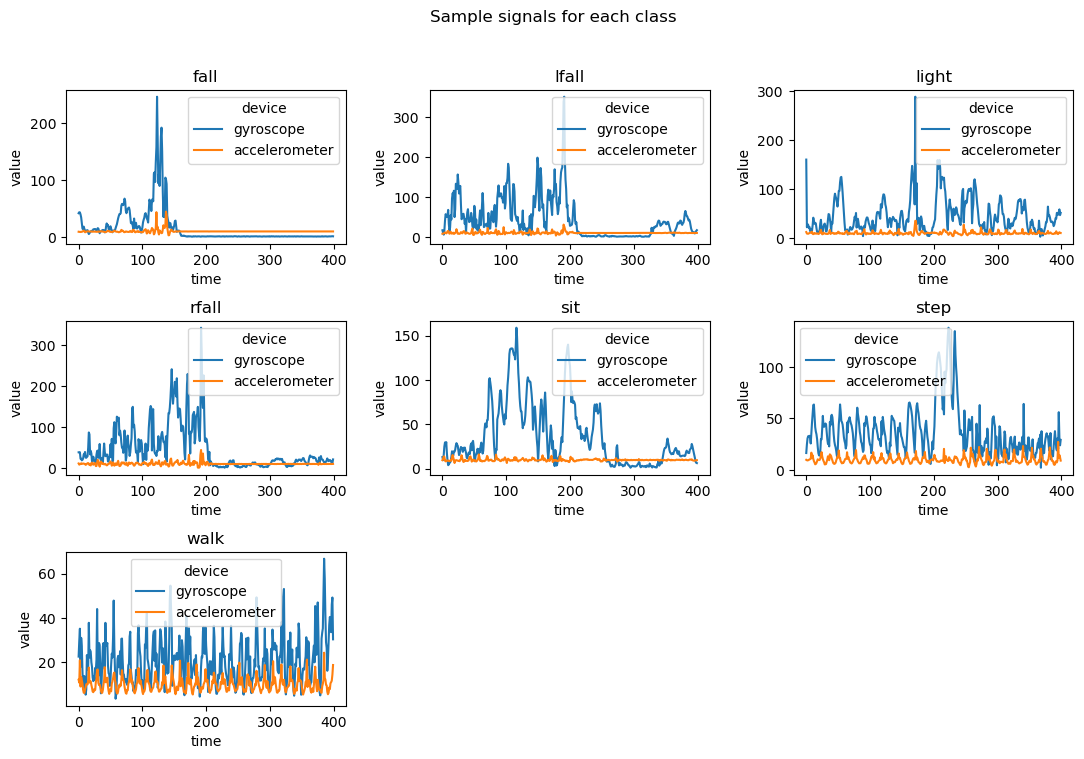

In [69]:
# Select one row for each different label class
sampled_rows = df.groupby('label').apply(lambda x: x.sample(1))

# Plot a pattern 
fig, ax = plt.subplots(3, 3, figsize=(13,8))
pos = {0: (0, 0), 1: (0, 1), 2: (0, 2), 3: (1, 0), 4: (1, 1), 5: (1, 2), 6: (2, 0), 7: (2, 1), 8: (2, 2)}
i=0
for label, row in sampled_rows.iterrows():
    acc = np.array(row[[col for col in row.index if col.startswith('acc')]])
    gyr = np.array(row[[col for col in row.index if col.startswith('gyr')]])
    temp = pd.DataFrame({"value":acc,
                          "time":np.arange(len(acc)),
                          "device": "accelerometer"})
    temp1 = pd.DataFrame({"value":gyr,
                          "time":np.arange(len(acc)),
                          "device": "gyroscope"})
    temp = pd.concat([temp1,temp])

    sns.lineplot(data=temp, x="time", y="value", hue="device", ax = ax[pos[i]], legend="brief")
    ax[pos[i]].set_title(label[0])
    i+=1

plt.suptitle("Sample signals for each class")
plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.delaxes(ax[pos[7]])
plt.delaxes(ax[pos[8]])
plt.show()

In [50]:
4//3

1

In [34]:
temp

,value,time,device
acc_1,10.603443,0,accelerometer
acc_2,19.410814,1,accelerometer
acc_3,10.182156,2,accelerometer
acc_4,7.648229,3,accelerometer
acc_5,7.509953,4,accelerometer
...,...,...,...
acc_396,9.220298,395,gyroscope
acc_397,11.836342,396,gyroscope
acc_398,12.360073,397,gyroscope
acc_399,11.987948,398,gyroscope


In [11]:
prova = preproc(df, labels)
prova

,acc_max_mag_1,acc_max_mag_2,acc_max_mag_3,acc_max_mag_4,acc_max_mag_5,acc_max_mag_6,acc_max_mag_7,acc_max_mag_8,acc_max_mag_9,acc_max_mag_10,...,gyr_max_mag_2,gyr_max_mag_3,gyr_max_mag_4,gyr_max_mag_5,gyr_max_mag_6,gyr_max_mag_7,gyr_max_mag_8,gyr_max_mag_9,gyr_max_mag_10,label
0,1.679561e+07,10801.345361,15443.379045,2494.648966,3506.348890,2881.347046,3416.295521,5800.178632,2368.599631,1473.222493,...,9.592757e+05,5.119511e+05,312838.119283,147240.538463,211720.022095,109374.244172,20964.153534,45291.483985,121592.068026,fall
1,1.666644e+07,10751.749903,22126.371544,7530.281961,6636.895371,4383.290907,5607.831278,4917.174318,1942.169619,3949.116959,...,2.627339e+06,6.657685e+05,465629.751594,116254.560780,361048.330523,248070.905590,182901.528829,45836.603978,57632.006013,fall
2,1.690417e+07,15663.913171,18483.969593,15089.006454,12469.690810,5080.274593,9184.062217,4675.716777,2361.136182,1662.668453,...,4.886385e+06,7.235702e+05,791065.811944,532990.905611,168062.542131,82527.888710,74912.734801,50200.552175,36780.468990,fall
3,1.690057e+07,27834.293492,58377.754093,9126.588154,8483.198818,5839.101415,3133.863000,1640.416392,3341.617160,4192.033963,...,4.422935e+06,6.838762e+05,380239.911926,266260.475134,219481.118060,135248.631338,136101.761931,117920.069358,73855.265233,fall
4,1.742747e+07,124734.902539,55886.725130,12170.351645,12544.880766,6504.401602,3993.475932,7620.558801,2822.194933,4559.995931,...,2.053406e+06,1.452541e+06,416519.314624,492788.710548,190757.846448,194313.119283,226042.230682,239743.219263,212045.393820,fall
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,1.638037e+07,16388.013912,11433.622947,12350.902330,15188.694745,6893.254251,3960.388446,803.969797,2660.412913,1624.898955,...,3.910192e+06,7.194042e+05,389663.003137,112379.522034,80732.642351,27678.196355,53746.852251,54694.151567,19737.802113,light
238,1.660464e+07,14302.864306,19305.212301,10808.249385,9077.769379,2102.045811,1453.138115,4566.588317,2296.186942,4651.806443,...,1.995195e+06,5.912486e+05,374060.032924,388659.395310,198740.942220,116755.550328,74039.095038,66162.299579,27381.467173,light
239,1.612340e+07,25131.303791,5905.058076,7903.859218,7405.519345,5113.755937,3755.953231,2746.683025,1416.069762,519.482796,...,3.504227e+06,1.211368e+06,554021.651008,124375.185208,197765.321892,96612.083350,60328.711581,36068.002933,46641.073757,light
240,1.613424e+07,6998.180669,15515.727474,10728.015104,4613.584971,1830.390414,812.754564,894.438233,1391.102353,1359.595058,...,1.856985e+06,1.246336e+06,233156.631661,205460.243089,112661.289028,127789.433541,80630.341534,72817.869024,21806.228030,light


# Split, scale etc... for the algorithms

In [24]:
from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
# for first and future models
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [17]:
# labels
y = prova["label"]
prova = prova.drop("label", axis=1)

# split data 
X_train, X_test, y_train, y_test = train_test_split(prova, y, test_size=0.3)

# scale the features (may be useful if we are going to add other features with different scale)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
X_test_scaled = scaler.fit_transform(X_test.astype(np.float64))

# First logistic - with all the classes (7)

In [182]:
sgd_clf = SGDClassifier()
sgd_clf.fit(X_train_scaled, y_train)
preds = sgd_clf.predict(X_test_scaled)


Check for the correct classes

In [138]:
sgd_clf.classes_

array(['fall', 'lfall', 'light', 'rfall', 'sit', 'step', 'walk'],
      dtype='<U5')

In [183]:
accuracy_score(y_test, preds)

0.7945205479452054

In [184]:
confusion_matrix(y_test, preds)

array([[10,  0,  0,  0,  0,  0,  0],
       [ 1,  1,  1,  1,  0,  0,  0],
       [ 2,  0, 17,  0,  0,  0,  0],
       [ 3,  1,  1,  0,  0,  0,  0],
       [ 0,  0,  1,  0, 15,  0,  0],
       [ 0,  0,  0,  0,  3,  2,  0],
       [ 0,  0,  1,  0,  0,  0, 13]], dtype=int64)

# Linear classifier with RandomizedSearchCV

I tried before with Randomized Search but I thought it skipped essential combinations since it always returned different results in terms of "best_params" (it didn't converge), also for high number of iterations.

Now the results seems "more stable" for some of the parameters but sometimes we obtain pretty different parameters

In [186]:
linear_params = {"loss": ["hinge", "log_loss", "modified_huber", "squared_hinge", "perceptron", "squared_error", "huber", "epsilon_insensitive", "squared_epsilon_insensitive"],
                   "penalty": ["l1", "l2", "elasticnet", None],
                   "alpha": [0.0001, 0.01, 0.1],
                   "fit_intercept": [True, False],
                   "learning_rate": ["constant", "optimal", "invscaling", "adaptive"]}

linear_search = GridSearchCV(sgd_clf, linear_params, scoring="accuracy", n_jobs=-1, cv=20)

fitted_linear_cv = linear_search.fit(X_train, y_train)

C:\Users\engri\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=20.
  warnings.warn(
C:\Users\engri\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
12960 fits failed out of a total of 17280.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
12960 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\engri\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\engri\AppData\Roaming\Python\Python

I tried GridSearch for different number of "folds" and the results seems to improve with an increasing number of folds

In [187]:
fitted_linear_cv.best_params_

{'alpha': 0.1,
 'fit_intercept': False,
 'learning_rate': 'optimal',
 'loss': 'modified_huber',
 'penalty': None}

In [193]:
new_sgd_clf = fitted_linear_cv.best_estimator_
new_sgd_clf.fit(X_train_scaled, y_train)
new_preds = new_sgd_clf.predict(X_test_scaled)

I tried both RandomizedSearchCV and GridSearchCV... but both underperform the default settings... we should check for the warnings/errors when trying "illegal" parameter combo 

In [194]:
accuracy_score(y_test, new_preds)

0.726027397260274

Now this last value of accuracy seems to stabilize a little bit with 20 folds but anytime we rerun the cell with the "new_sgd_clf" algorithm (2 cells above) results slightly change (between 0.65 and 0.83 of accuracy)

# Random Forest

In [113]:
from sklearn.ensemble import RandomForestClassifier

In [190]:
rf_clf = RandomForestClassifier()

rf_params = {"n_estimators": [100, 200, 500, 50, 1000],
            "criterion": ["gini", "entropy", "log_loss", None],
            "max_depth": [None, 100, 50],
            "bootstrap": [True, False],
            "max_features": ["sqrt", "log2", None],
            }

rf_search = RandomizedSearchCV(rf_clf, rf_params, scoring="accuracy", n_jobs=-1, cv=10, n_iter=100)

fitted_rf_cv = rf_search.fit(X_train, y_train)

C:\Users\engri\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\engri\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
230 fits failed out of a total of 1000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
105 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\engri\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\engri\AppData\Roaming\Python\Python39\si

In [191]:
fitted_rf_cv.best_params_

{'n_estimators': 50,
 'max_features': 'log2',
 'max_depth': 100,
 'criterion': 'gini',
 'bootstrap': True}

Ok, accuracy seems to improve towards the upper bound obtained for the linear model: in case of random forest the performance value stabilized for each possible combo of parameters (also if we use an higher numer of iterations for the Randomized Search CV)

In [192]:
rf_clf = fitted_rf_cv.best_estimator_
rf_clf.fit(X_train_scaled, y_train)
rf_preds = rf_clf.predict(X_test_scaled)
accuracy_score(y_test, rf_preds)

0.821917808219178

Quick Disclaimer: I think it isn't really useful to try out a larger CV (both in terms of number of folds and in terms of number of iterations) since the accuracy is always the same and the "best parameters" selected by the CV are mostly the same.

# XGBoost

In [197]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

In [215]:
# we need to encode the labels for xgboost package
le = LabelEncoder()
le.fit(y_train.unique())
y_tr = le.transform(y_train)
y_te = le.transform(y_test)

xgb_clf = XGBClassifier(tree_method="hist", early_stopping_rounds=2)
xgb_clf.fit(X_train, y_tr, eval_set=[(X_test, y_te)])
xgb_preds = xgb_clf.predict(X_test)

[0]	validation_0-mlogloss:1.38001
[1]	validation_0-mlogloss:1.08246
[2]	validation_0-mlogloss:0.90257
[3]	validation_0-mlogloss:0.79278
[4]	validation_0-mlogloss:0.70344
[5]	validation_0-mlogloss:0.63575
[6]	validation_0-mlogloss:0.57606
[7]	validation_0-mlogloss:0.54751
[8]	validation_0-mlogloss:0.51764
[9]	validation_0-mlogloss:0.49624
[10]	validation_0-mlogloss:0.48035


[11]	validation_0-mlogloss:0.46886
[12]	validation_0-mlogloss:0.45748
[13]	validation_0-mlogloss:0.44784
[14]	validation_0-mlogloss:0.44408
[15]	validation_0-mlogloss:0.43843
[16]	validation_0-mlogloss:0.43526
[17]	validation_0-mlogloss:0.43023
[18]	validation_0-mlogloss:0.43160
[19]	validation_0-mlogloss:0.43033


Ouffffff improving again... too strong for this project

In [216]:
accuracy_score(y_te, xgb_preds)

0.8767123287671232

# KNN

In [22]:
from sklearn.neighbors import KNeighborsClassifier

In [33]:
knn_clf = KNeighborsClassifier()
knn_params = {"n_neighbors": np.array(range(0,201, 5)),
            "algorithm": ["auto", "ball_tree", "kd_tree", "brute"],
            "leaf_size": [30, 100, 50, 150],
            "p": [1, 2, 3]
            }
knn_search = RandomizedSearchCV(knn_clf, knn_params, scoring="accuracy", n_jobs=-1, cv=10, n_iter=200)

fitted_knn_cv = knn_search.fit(X_train, y_train)

C:\Users\engri\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\engri\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
90 fits failed out of a total of 2000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\engri\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\engri\AppData\Roaming\Python\Python39\site

In [34]:
fitted_knn_cv.best_params_

{'p': 1, 'n_neighbors': 20, 'leaf_size': 150, 'algorithm': 'kd_tree'}

In [35]:
knn_clf = fitted_knn_cv.best_estimator_
knn_clf.fit(X_train_scaled, y_train)
knn_preds = knn_clf.predict(X_test_scaled)
accuracy_score(y_test, knn_preds)

0.6986301369863014

Knn seems to not well perform in any case also adding iterations to the Randomized Search to best approximate the best params: accuracy is stuck at 0.69